In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math

# Exercise 3

In [2]:
I = np.arange(-4,5)
J = np.arange(-20,1)

a_i = 10.**I
eps_j = 10.**J

# like an outer product of vectors, only its a sum (row vector + column vector)
B = a_i[:, np.newaxis] + eps_j[np.newaxis, :]
# a_i column copied 21 times
A_i = np.tile(a_i , (len(J),1)).T

boolean_Matrix = B == A_i

In [3]:
max_indices = np.array([
    np.max(np.where(row)[0]) if row.any() else None
    for row in boolean_Matrix
])  
print([index.item()-20 if index!=None else None for index in max_indices ])

[None, -19, -19, -18, -16, -16, -15, -14, -13]


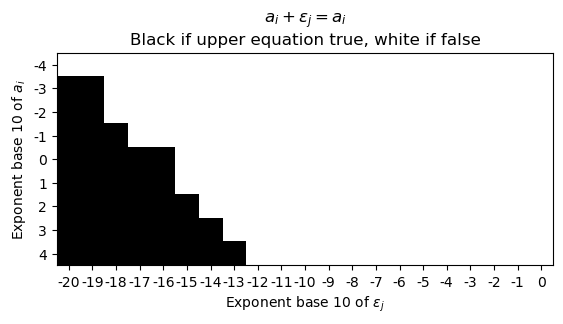

In [4]:

plt.imshow(boolean_Matrix, cmap='binary')
# Set custom tick positions and labels for both axes
plt.xticks(np.arange(21),np.arange(-20, 1))
plt.xlabel('Exponent base 10 of $\\varepsilon_j$')
plt.yticks(np.arange(9),np.arange(-4, 5))
plt.ylabel('Exponent base 10 of $a_i$')
plt.title('$a_i + \\varepsilon_j = a_i$\nBlack if upper equation true, white if false')
plt.show()

We see that the error for adding two floats is relative to the exponent. According to the plot the relative precision for $i = 0$ i.e. for $a_0 = 1$ is in the magnitude of $\varepsilon_0 =  10^{-16}$

In [7]:
error = math.nextafter(1.,2) - 1
print(f"real error: {error:.2e}")

real error: 2.22e-16


# Exercise 4

In [8]:
A = np.array([[np.sqrt(2)/2, -np.sqrt(2)/2],[np.sqrt(2)/2,np.sqrt(2)/2]])
u = np.random.random(size=(100,2))
f = np.array([A @ u_i for u_i in u])
u_hat = np.array([np.linalg.solve(A,f_i) for f_i in f])
Delta = 1/u.shape[0] * np.sum(np.linalg.norm(u_hat-u, axis=1)/np.linalg.norm(u, axis=1))
print(f"Delta = {Delta:.2e}")

Delta = 7.84e-17


In [9]:
B = lambda eps: np.array([[1, 1+eps],[1,1]])
Delta_B = np.empty(12)
u = np.random.random(size=(100,2))

for j in reversed(range(1,13)):
    B_eps = B(10**(-j))
    f = np.array([B_eps @ u_i for u_i in u])
    u_hat = np.array([np.linalg.solve(B_eps,f_i) for f_i in f])
    Delta_B[j-1]=(1/u.shape[0] * np.sum(np.linalg.norm(u_hat-u, axis=1)/np.linalg.norm(u, axis=1)))

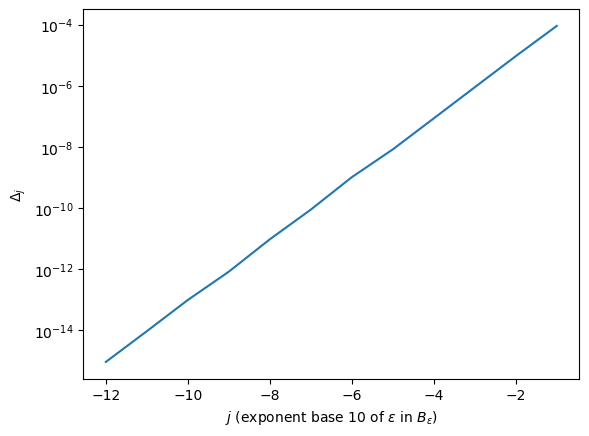

In [10]:
plt.plot(np.arange(-12,0), Delta_B)
plt.yscale('log')
plt.xlabel('$j$ (exponent base 10 of $\\varepsilon$ in $B_\\varepsilon$)')
plt.ylabel('$\\Delta_j$')
plt.show()


We see that the solution error $\Delta_j$ increases rapidly as $\varepsilon_j$ increases. This may be due to the fact that for very small $\varepsilon$ the numbers 1 and $1+\varepsilon$ are indistinguishable, and then we have a singular matrix, and the built-in method uses some exact algorithm to solve the problems. But when $\varepsilon_j$ is large, this does not happen and we have a nearly singular matrix, which is usually very hard to solve with some numerical algorithms, which Python probably uses in this case.